In [2]:
import cv2 as cv
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from IPython.display import clear_output
from IPython import display
from Classifiers import *
from functions import *

In [5]:
def accuracies (classifier, start,stop,step, cl='d'):
    result = []
    sizes = []
    for size in np.arange(start, stop, step):
        clear_output(wait=True)
        print(size)
        if cl == 'SC':
            clf = classifier(sizes=[size])
        elif cl == 'SCA':
            sizes.append(size)
            clf = classifier(sizes=sizes)
        else:
            clf = classifier(size=size)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        result.append(accuracy_score(y_pred, y_test))
    if cl=='SCA':
        return result,sizes
    else:
        return result

In [4]:
path = 'att'
images = []
names = []
for name, directory in enumerate(sorted(os.listdir(path))):
    directory_path = os.path.join(path, directory)
    for image_name in os.listdir(directory_path):
        image_path = os.path.join(directory_path, image_name)
        img = cv.imread(image_path, 0)
        images.append(img)
        names.append(name)
images = np.array(images)
names = np.array(names)
X_train, X_test, y_train, y_test = train_test_split(images, names, test_size=len(np.unique(names)),random_state=23, 
                                                    stratify=names)

## Гистограмма яркости

In [4]:
acc_classifier(BC(),X_train, y_train)

1.0


## DFT

In [5]:
acc_classifier(DFTC(),X_train, y_train)

1.0


## DCT

In [6]:
acc_classifier(DCTC(),X_train, y_train)

1.0


## Scale

In [7]:
clf = SC(sizes=[1.0,  0.5])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
accuracy_score(y_pred, y_train)

1.0

## Градиент

In [8]:
acc_classifier(GC(),X_train, y_train)

1.0


## Гистограмма яркости

Оптимальный size: 14
Acc: 1.0


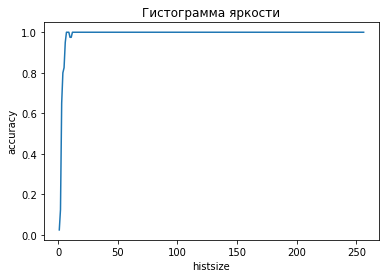

In [9]:
accuracies = []
for size in range(1, 257):
    clf = BC(hist_size=size)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_pred, y_test))
plt.plot(range(1, 257), accuracies)
plt.xlabel('histsize')
plt.ylabel('accuracy')
plt.title('Гистограмма яркости');
print('Оптимальный size:', np.arange(8, 257, 1)[np.argmax(accuracies)])
print('Acc:', max(accuracies))

## DFT

0.9999999999999999
Оптимальный параметр: 0.6699999999999999
Acc: 0.9


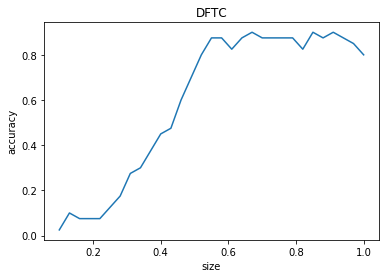

In [13]:
array = accuracies(DFTC,0.1, 1.01, 0.03)

plt.plot(np.arange(0.1, 1.01, 0.03), array)
plt.xlabel('size')
plt.ylabel('accuracy')
plt.title('DFTC');
print('Оптимальный параметр:', np.arange(0.1, 1.01, 0.03)[np.argmax(array)])
print('Acc:', max(array))

## DCT

1.0
Оптимальный size: 0.06999999999999999
Acc: 1.0


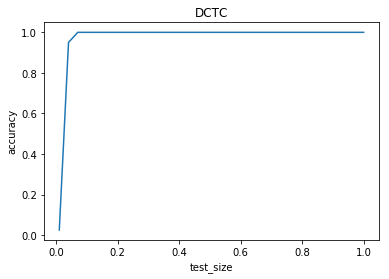

In [20]:
array = accuracies(DCTC,0.01, 1.03, 0.03)

plt.plot(np.arange(0.01, 1.03, 0.03), array)
plt.xlabel('test_size')
plt.ylabel('accuracy')
plt.title('DCTC');
print('Оптимальный size:', np.arange(0.01, 1.03, 0.03)[np.argmax(array)])
print('Acc:', max(array))

## Scale

1.0000000000000004
Оптимальный параметр: 0.15000000000000002
Acc: 1.0


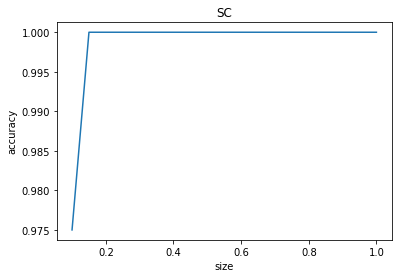

In [14]:
array = accuracies(SC,0.1, 1.05, 0.05,cl='SC')

plt.plot(np.arange(0.1, 1.05, 0.05), array)
plt.xlabel('size')
plt.ylabel('accuracy')
plt.title('SC');
print('Оптимальный параметр:', np.arange(0.1, 1.05, 0.05)[np.argmax(array)])
print('Acc:', max(array))

### массив size

In [ ]:
array,sizes = accuracies(SC,0.01, 1.05, 0.05,cl='SCA')

plt.plot(np.arange(0.01, 1.05, 0.05), array)
plt.xlabel('size')
plt.ylabel('accuracy')
plt.title('SC');
print('Оптимальные параметры:', sizes[:np.argmax(array) + 1])
print('Точность:', np.max(array))

## Градиент

In [ ]:
array = []
for ksize in range(1, 32, 2):
    clf = GC(ksize=ksize)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    array.append(accuracy_score(y_pred, y_test))
plt.plot(range(1, 32, 2), array)
plt.xlabel('ksize')
plt.ylabel('accuracy')
plt.title('Градиент');
print('Оптимальный параметр:', list(range(1, 32, 2))[np.argmax(array)])
print('Точность:', max(array))

# Кросс-Валидация исходных данных

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=14)
bright_cv = []
dft_cv = []
dct_cv = []
scale_cv = []
grad_cv = []
for i, (train_id, test_id) in enumerate(skf.split(images, names), start=1):
    
    clear_output(wait=True)
    print(i)
    
    X_train, y_train = images[train_id], names[train_id]
    X_test, y_test = images[test_id], names[test_id]

    y_pred = all_classifiers(BC(256),X_train,y_train,X_test)
    bright_cv.append(accuracy_score(y_pred, y_test))
    
    y_pred = all_classifiers(DFTC(size=0.61),X_train,y_train,X_test)
    dft_cv.append(accuracy_score(y_pred, y_test))
    
    y_pred = all_classifiers(DCTC(size=0.1),X_train,y_train,X_test)
    dct_cv.append(accuracy_score(y_pred, y_test))

    y_pred = all_classifiers(SC(sizes=[0.15]),X_train,y_train,X_test)
    scale_cv.append(accuracy_score(y_pred, y_test))
    
    y_pred = all_classifiers(GC(ksize=29),X_train,y_train,X_test)
    grad_cv.append(accuracy_score(y_pred, y_test))
    
print('Гистограмма яркости:', np.mean(bright_cv))
print('DFT:', np.mean(dft_cv))
print('DCT:', np.mean(dct_cv))
print('Scale:', np.mean(scale_cv))
print('Градиент:', np.mean(grad_cv))

## Зависимости распознавания от числа тестовых изображений в выборке

360


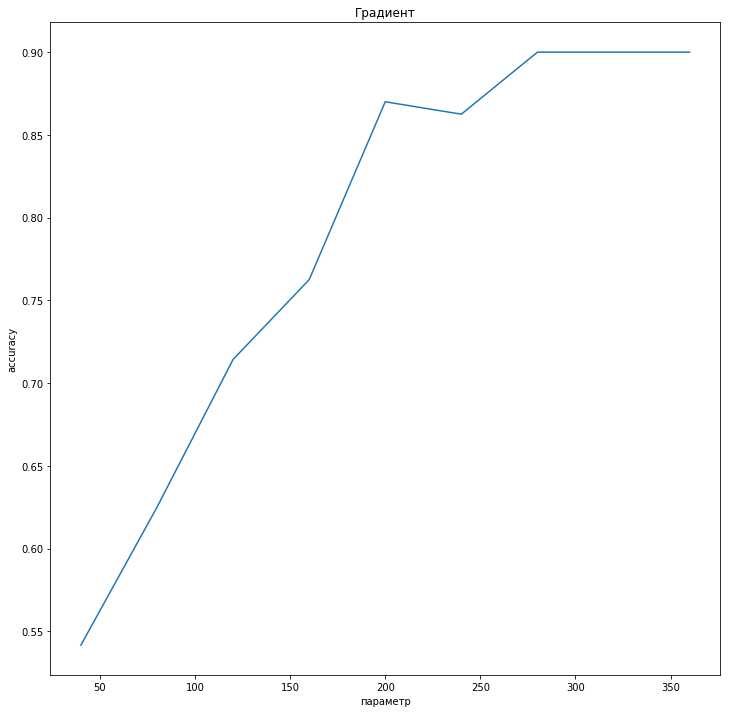

In [28]:
bright = []
dft = []
dct = []
scale = []
grad = []
for i, size in enumerate(range(40, 370, 40), start=1):
    
    clear_output(wait=True)
    print(size)
    
    X_train, X_test, y_train, y_test = train_test_split(images, names, test_size=size, 
                                                        random_state=23, stratify=names)
    #y_pred = all_classifiers(BC(14),X_train,y_train,X_test)
    #bright.append(accuracy_score(y_pred, y_test))
    
    #y_pred = all_classifiers(DFTC(size=0.67),X_train,y_train,X_test)
    #dft.append(accuracy_score(y_pred, y_test))
    
    #y_pred = all_classifiers(DCTC(size=0.07),X_train,y_train,X_test)
    #dct.append(accuracy_score(y_pred, y_test))

    #y_pred = all_classifiers(SC(sizes=[0.15]),X_train,y_train,X_test)
    #scale.append(accuracy_score(y_pred, y_test))
    
    y_pred = all_classifiers(GC(ksize=15),X_train,y_train,X_test)
    grad.append(accuracy_score(y_pred, y_test))

#fig=plt.figure(figsize=(12,12))
#fig.add_subplot(1,1,1)
#plot_accuracy(list(reversed(range(40, 370, 40))), bright, 'Гистограмма яркости')

#fig=plt.figure(figsize=(12,12))
#fig.add_subplot(1,1,1)
#plot_accuracy(list(reversed(range(40, 370, 40))), dft, 'DFT')


#fig=plt.figure(figsize=(12,12))
#fig.add_subplot(1,1,1)
#plot_accuracy(list(reversed(range(40, 370, 40))), dct, 'DCT')

#fig=plt.figure(figsize=(12,12))
#fig.add_subplot(1,1,1)
#plot_accuracy(list(reversed(range(40, 370, 40))), scale, 'Scale')

fig=plt.figure(figsize=(12,12))
fig.add_subplot(1,1,1)
plot_accuracy(list(reversed(range(40, 370, 40))), grad, 'Градиент')

## Визуализация

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, names, test_size=len(np.unique(names)), 
                                                    random_state=14, stratify=names)
y_pred_bright = all_classifiers(BC(), X_train, y_train, X_test)

y_pred_dft = all_classifiers(DFTC(), X_train, y_train, X_test)

y_pred_dct = all_classifiers(DCTC(), X_train, y_train, X_test)

y_pred_sc = all_classifiers(SC(), X_train, y_train, X_test)

y_pred_gc = all_classifiers(GC(), X_train, y_train, X_test)

In [ ]:
fig = plt.figure(figsize=(20,20))
for i, (true, image) in enumerate(zip(y_test, X_test)):
    
    fig.add_subplot(3, 4, 2)
    k = check(y_pred_bright[i],true,image,images)
    plt.title("Гистограмма яркости")
    fig.add_subplot(3, 4, 1)
    checkOr(k,image)
    
    fig.add_subplot(3, 4, 4)
    k = check(y_pred_dft[i],true,image,images)
    plt.title("DFT")
    fig.add_subplot(3, 4, 3)
    checkOr(k,image)
    
    fig.add_subplot(3, 4, 6)  
    k = check(y_pred_dct[i],true,image,images)
    plt.title("DCT")
    fig.add_subplot(3, 4, 5)
    checkOr(k,image)
    
    fig.add_subplot(3, 4, 8)
    k = check(y_pred_sc[i],true,image,images)
    plt.title("Scale")
    fig.add_subplot(3, 4, 7)
    checkOr(k,image)
    
    fig.add_subplot(3, 4, 10)
    k = check(y_pred_gc[i],true,image,images)
    plt.title("Градиент")
    fig.add_subplot(3, 4, 9)
    checkOr(k,image)

    display.display(plt.gcf())
    clear_output(wait=True)

# ГОЛОСОВАНИЕ

#### def params

In [ ]:
print(vote(X_train, y_train,X_test, y_test))

#### opt params

In [ ]:
print(vote(X_train, y_train,X_test, y_test,256,0.61,0.1,[0.05, 0.1],29))

**Зависимость распознавания от числа тестовых изображений в выборке**

KeyboardInterrupt: 

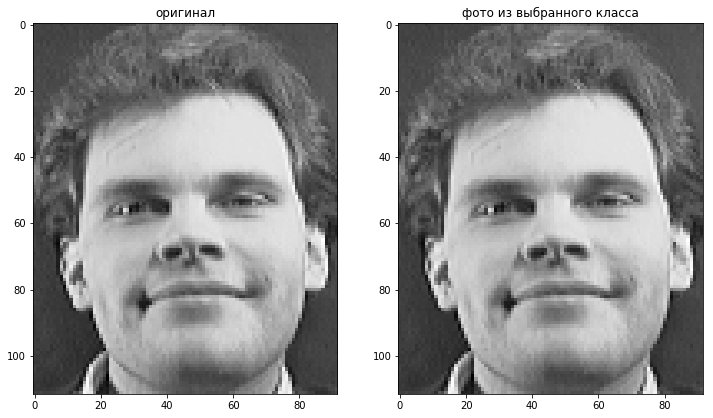

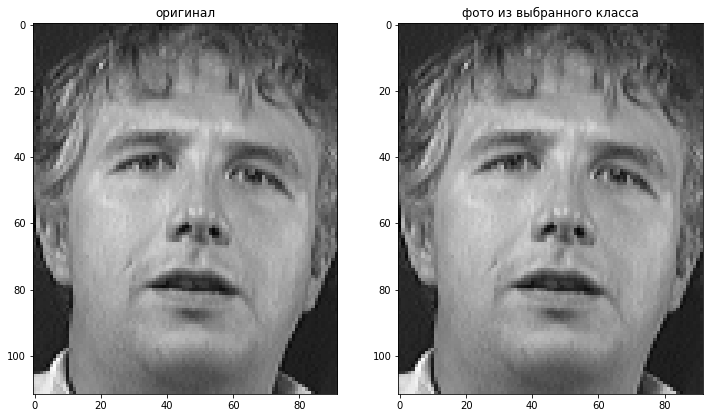

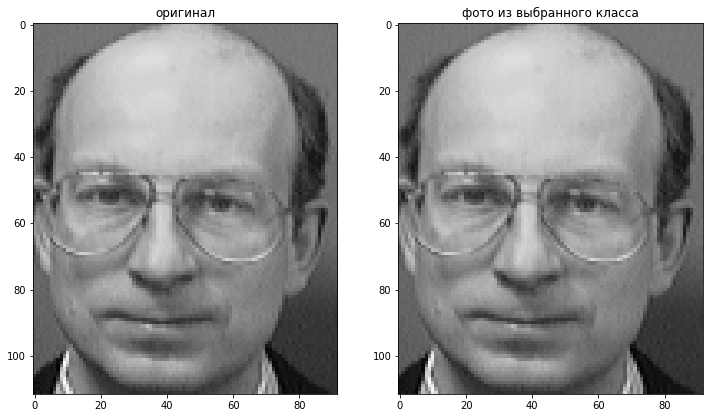

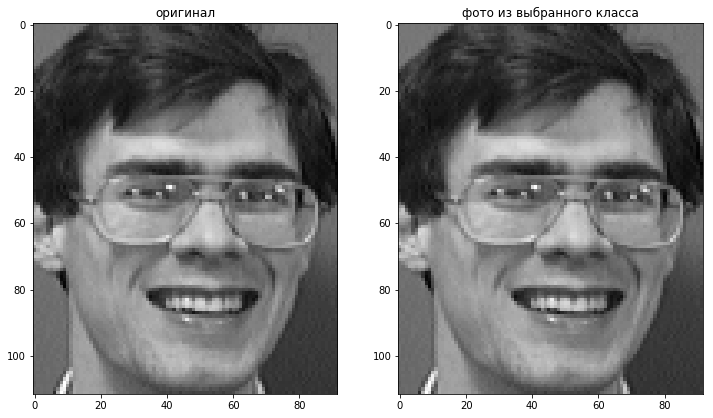

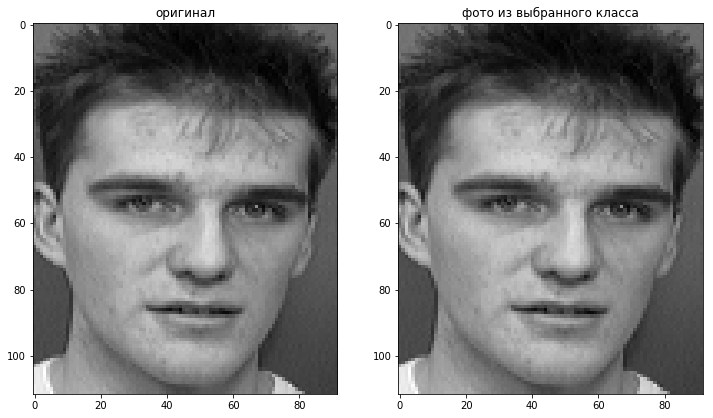

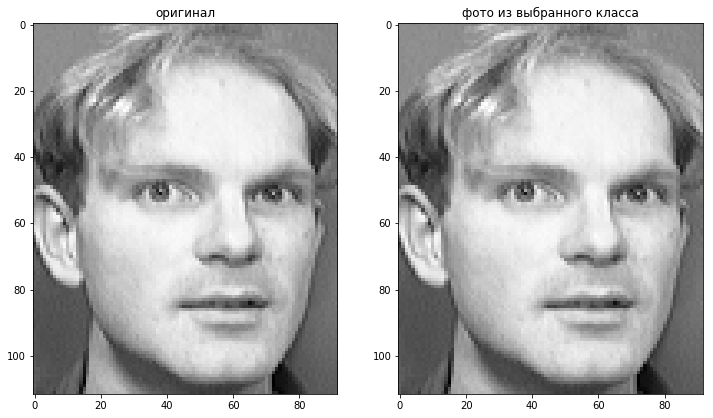

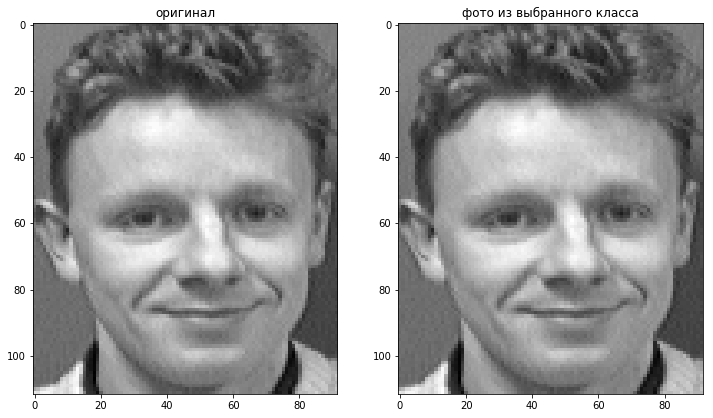

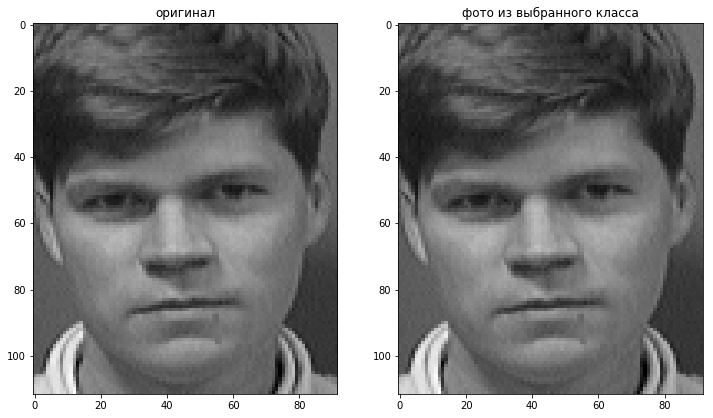

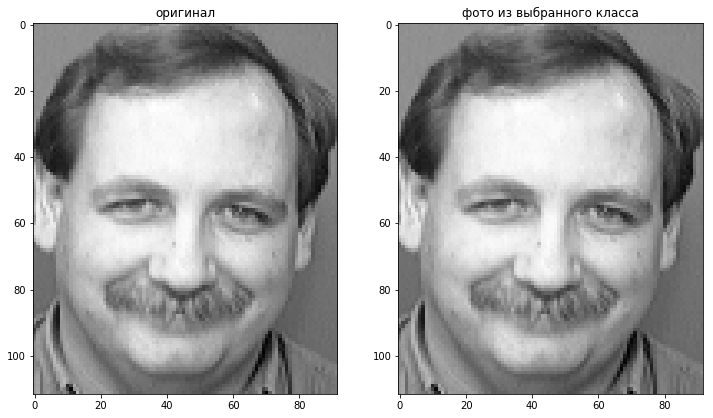

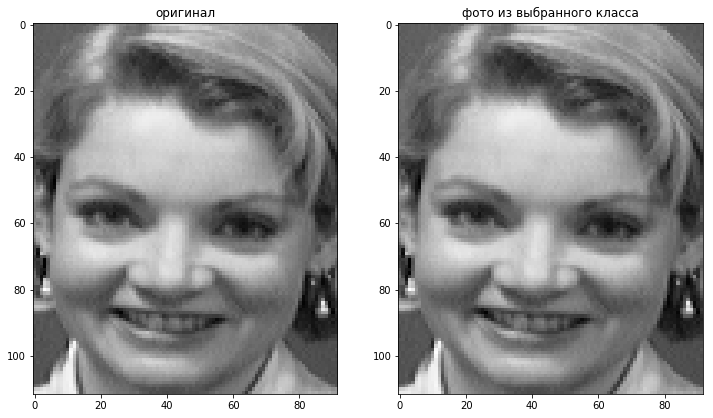

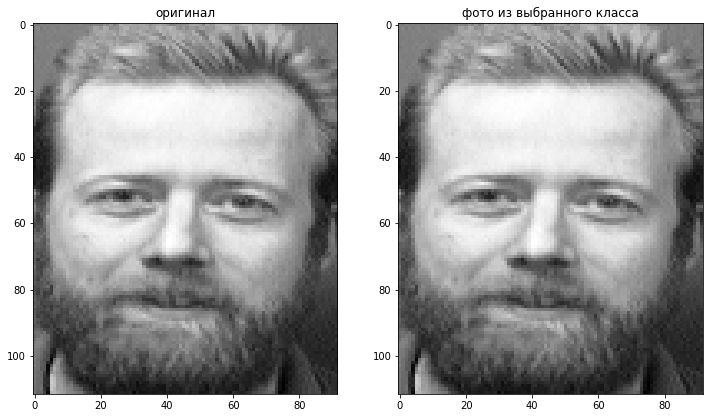

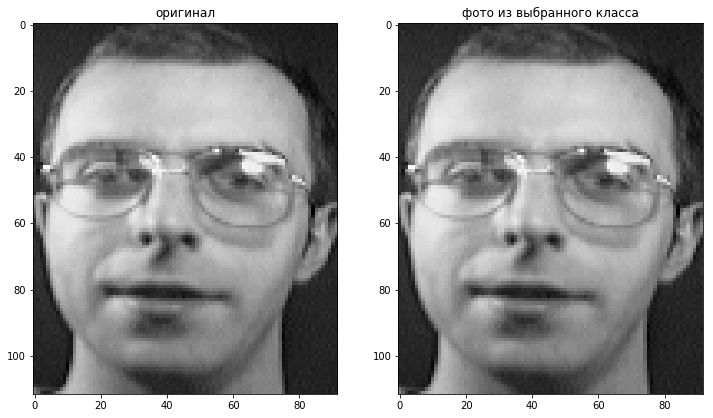

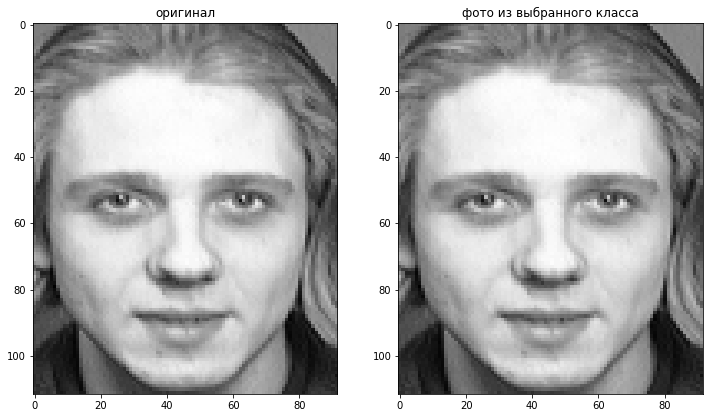

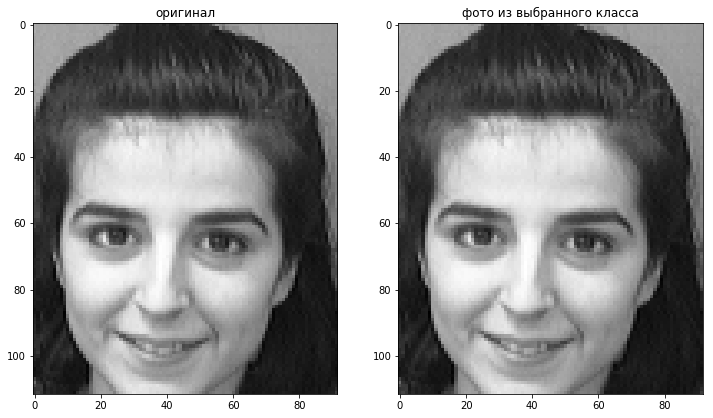

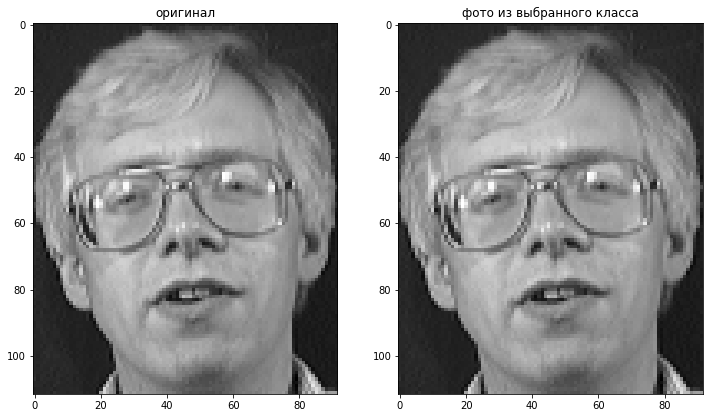

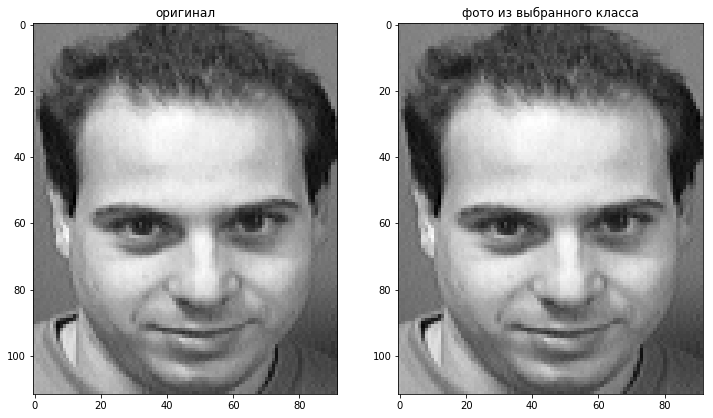

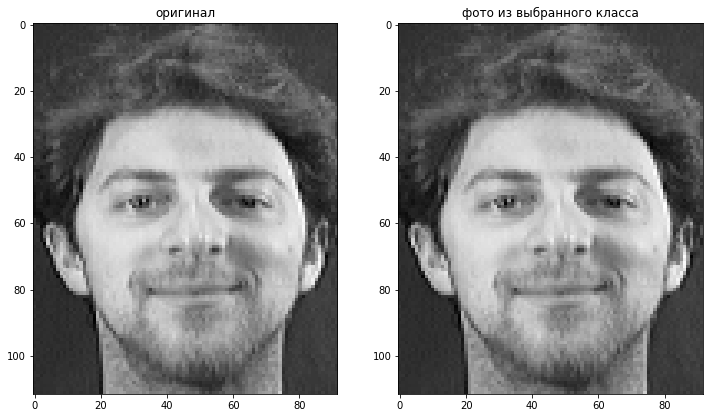

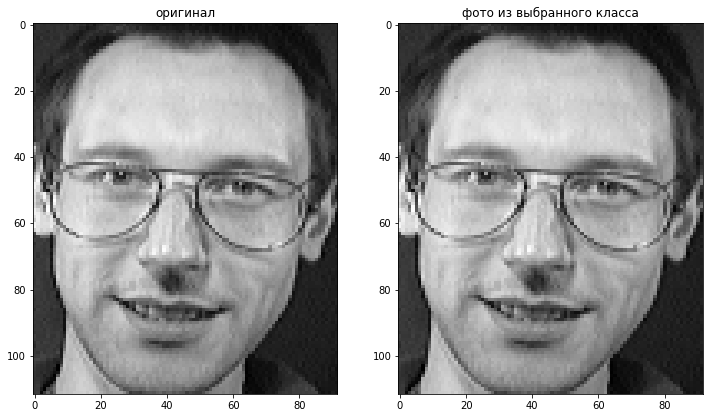

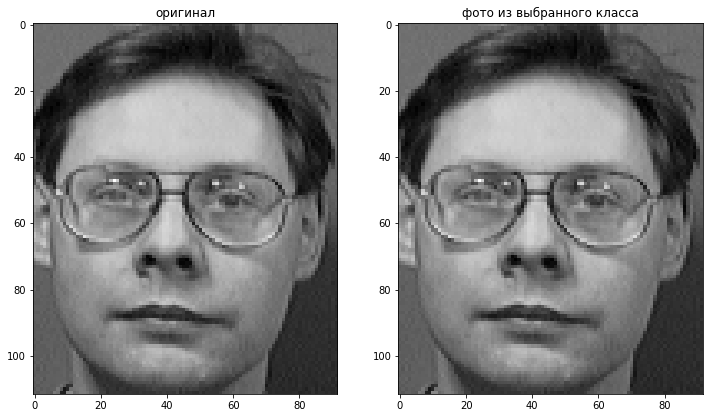

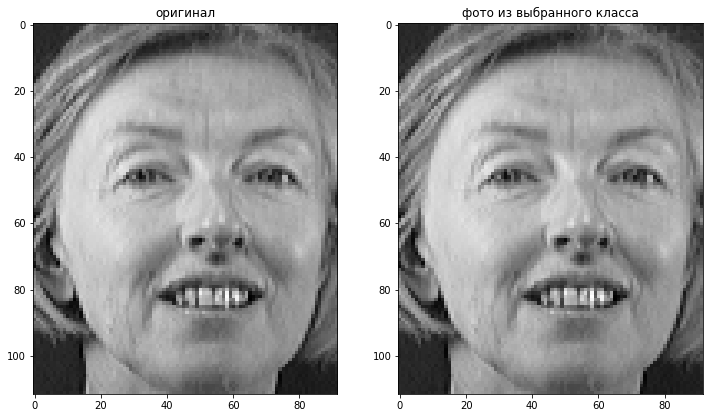

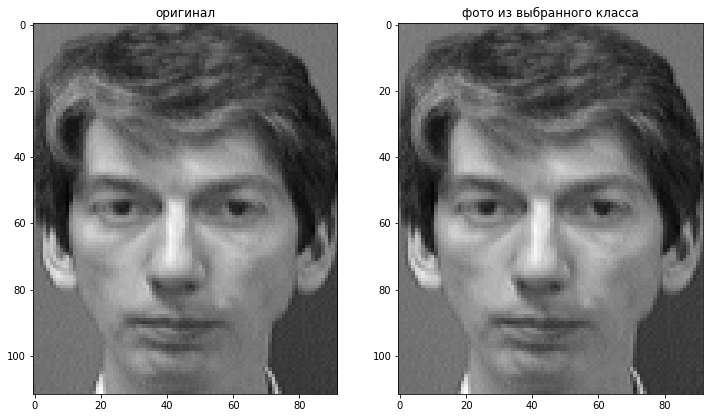

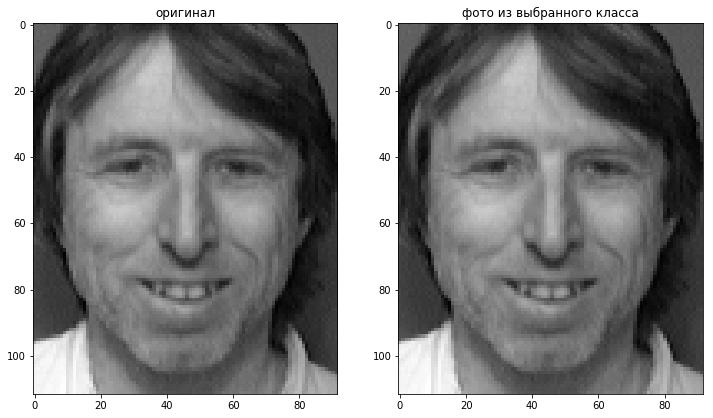

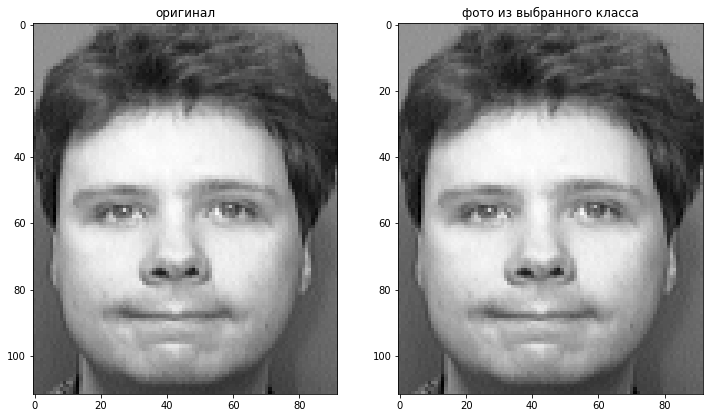

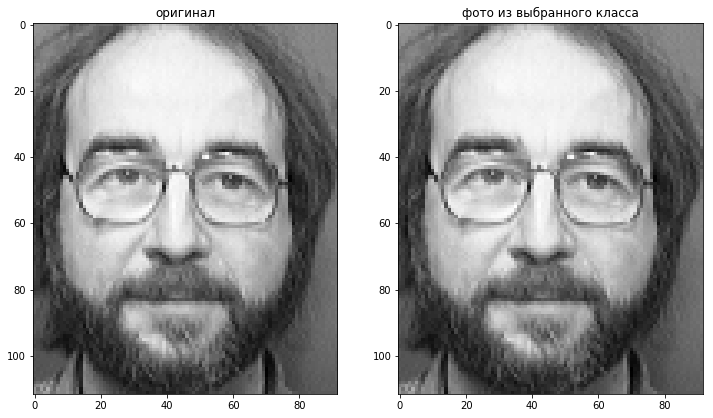

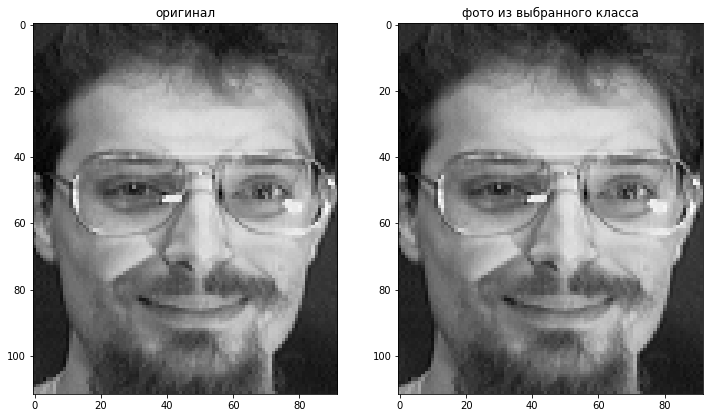

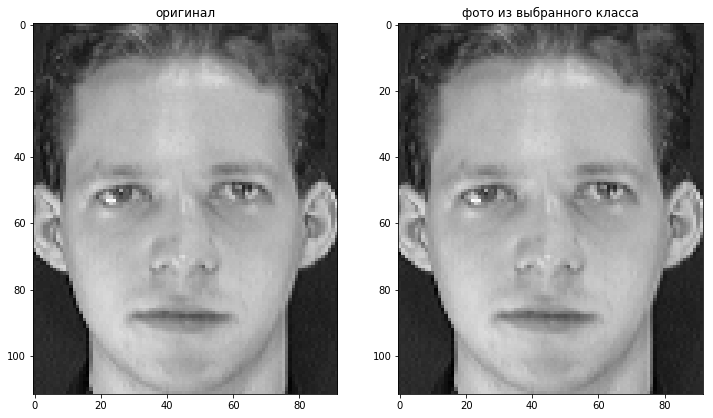

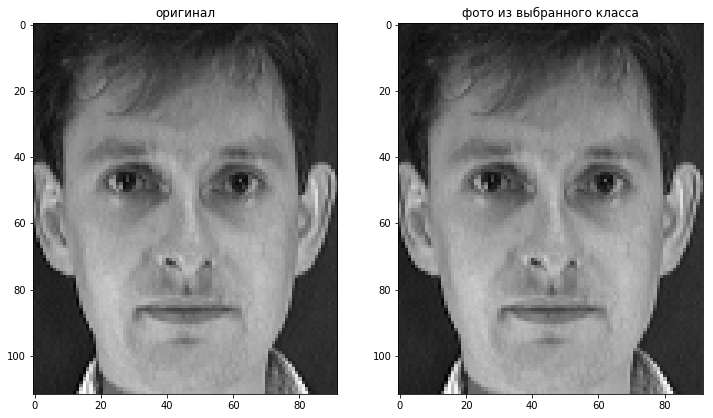

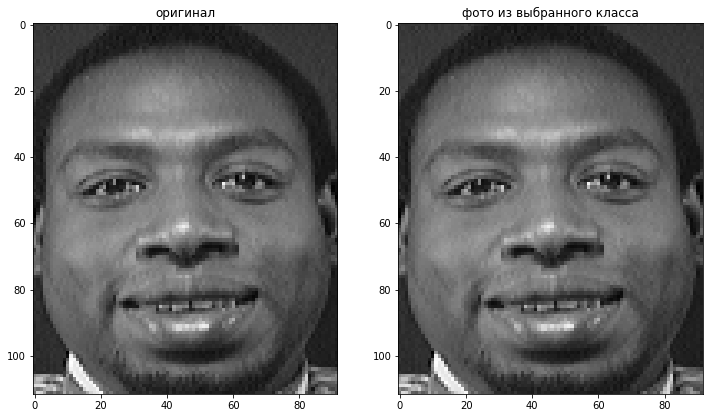

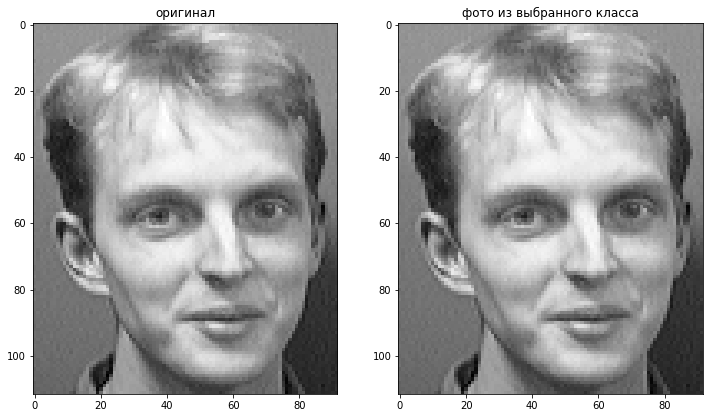

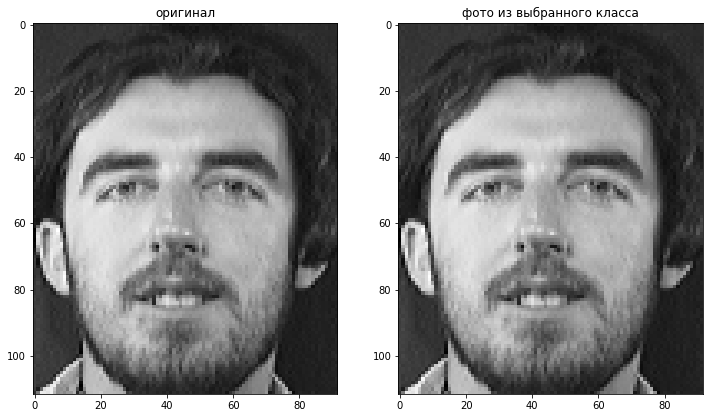

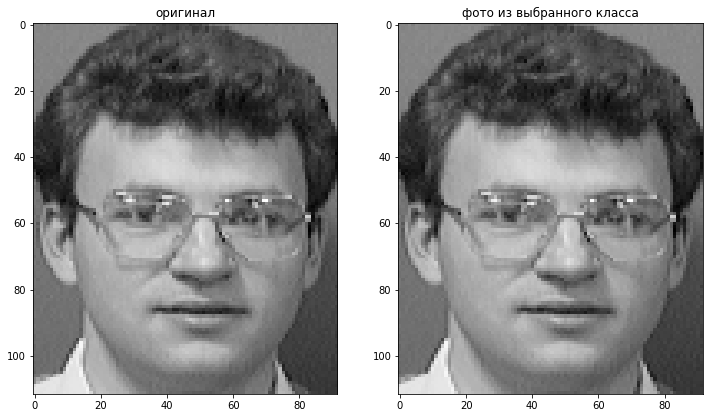

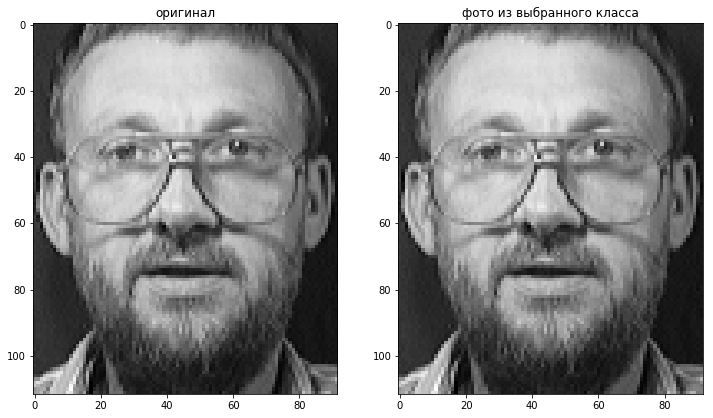

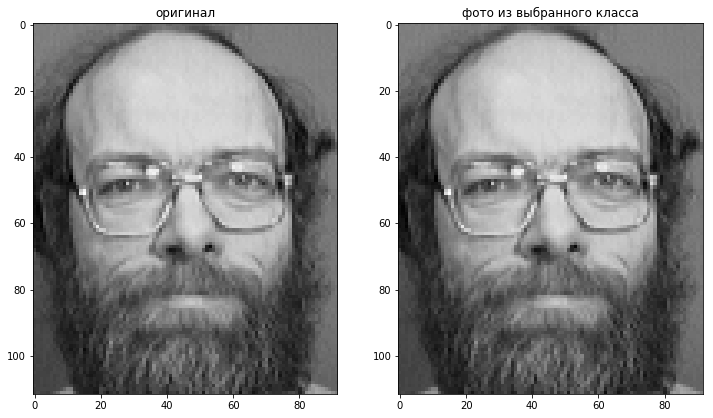

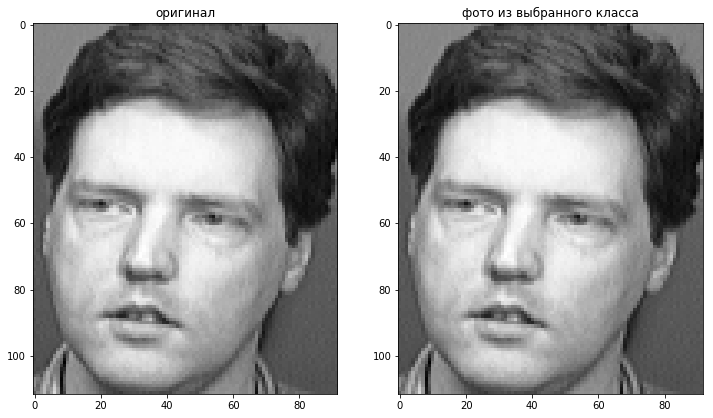

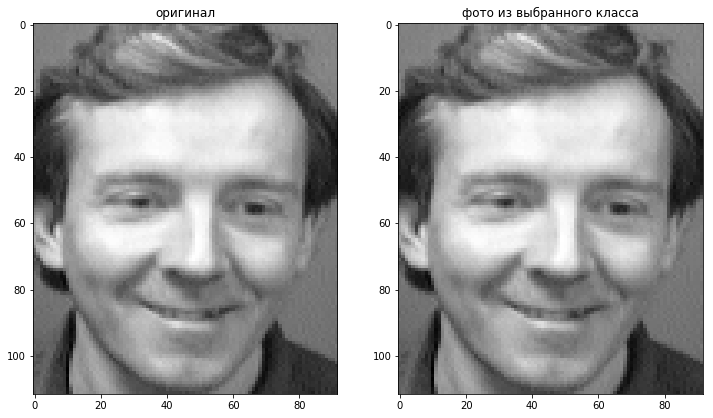

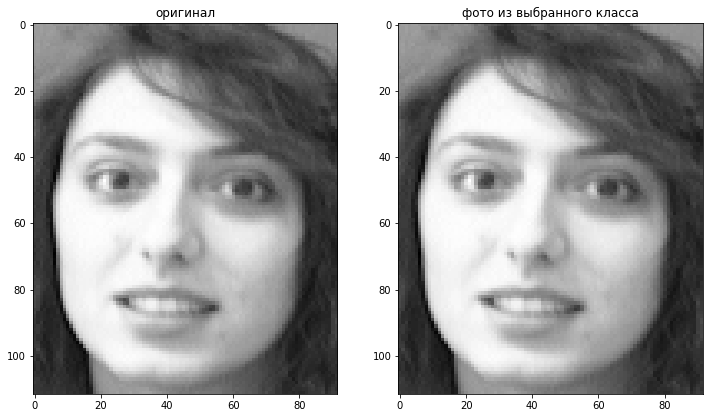

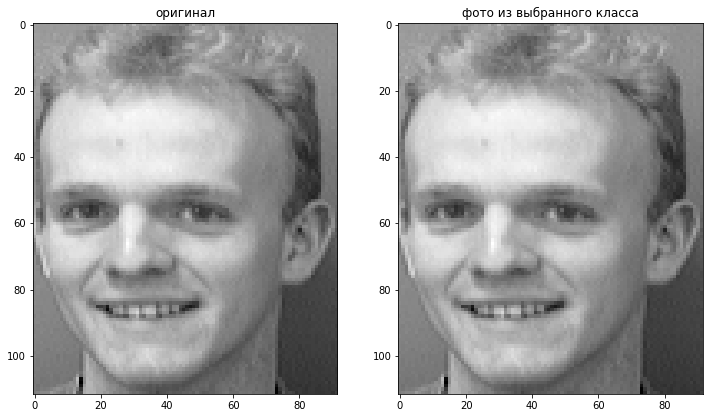

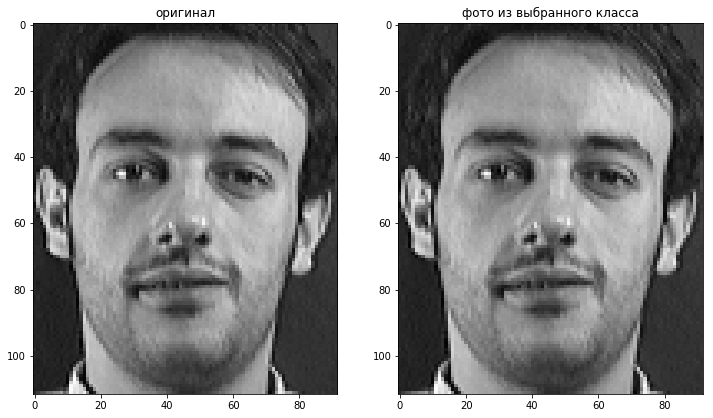

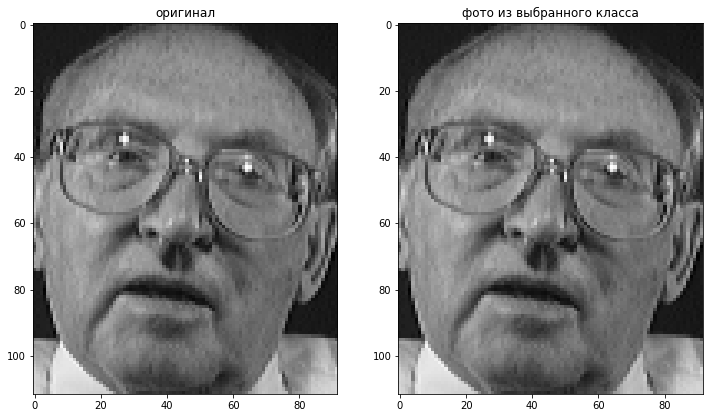

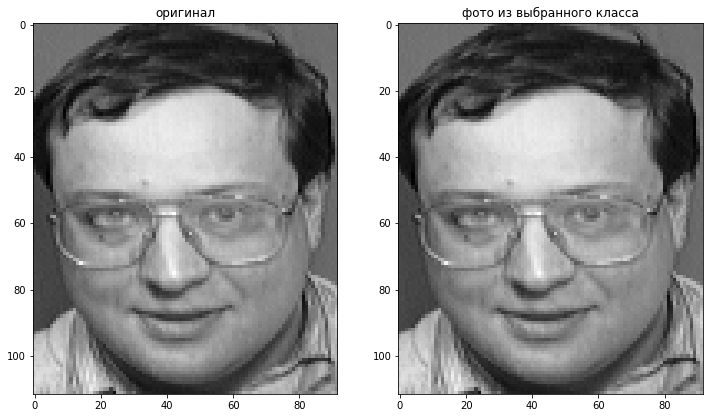

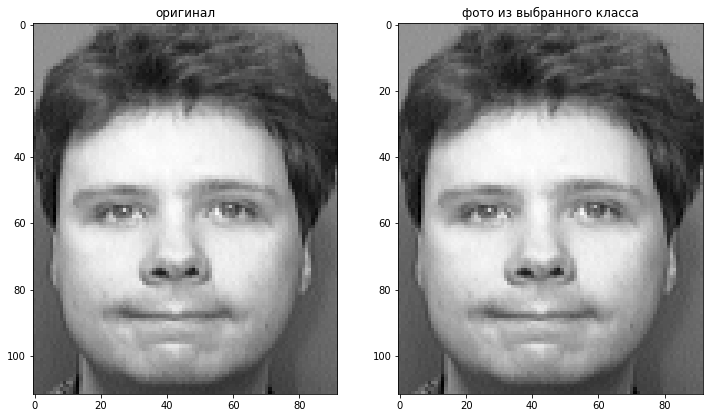

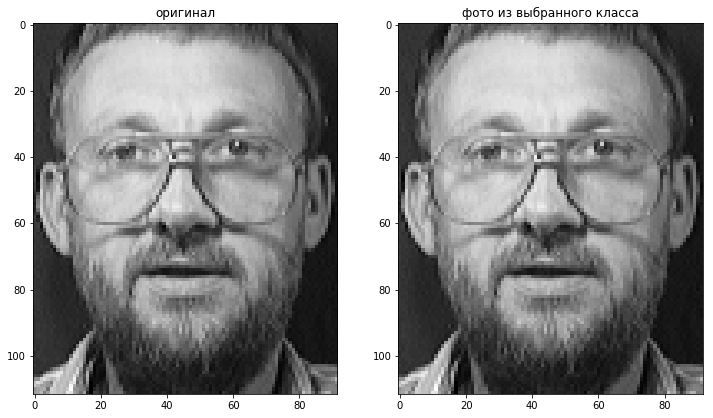

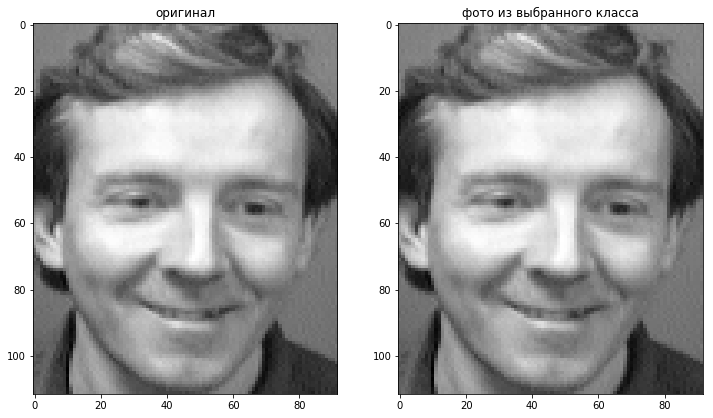

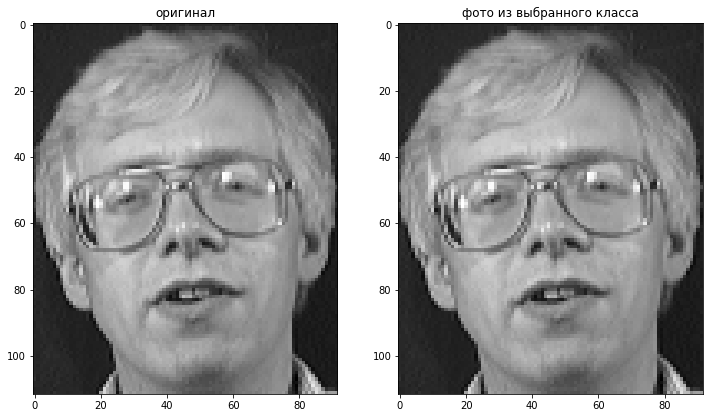

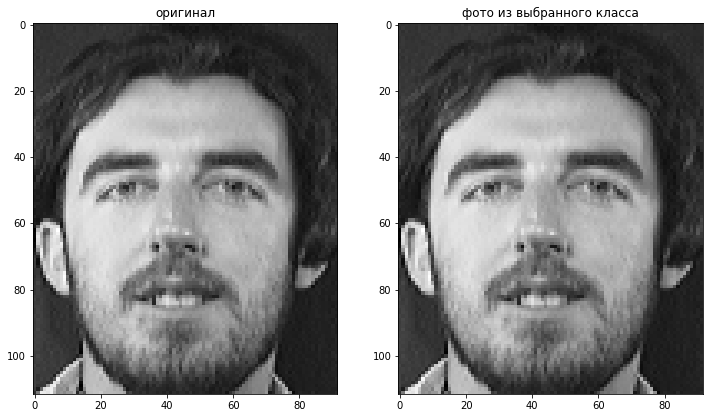

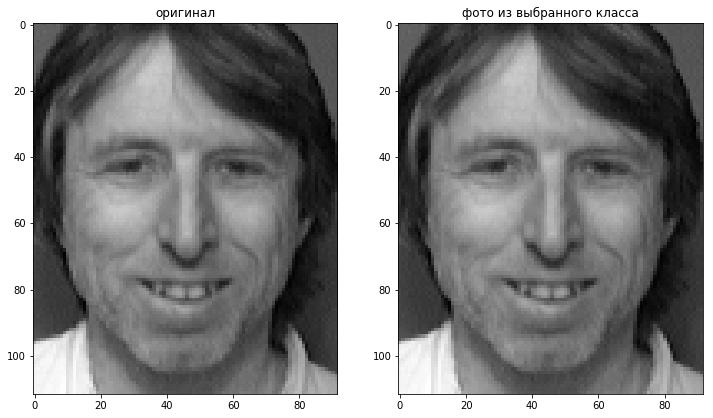

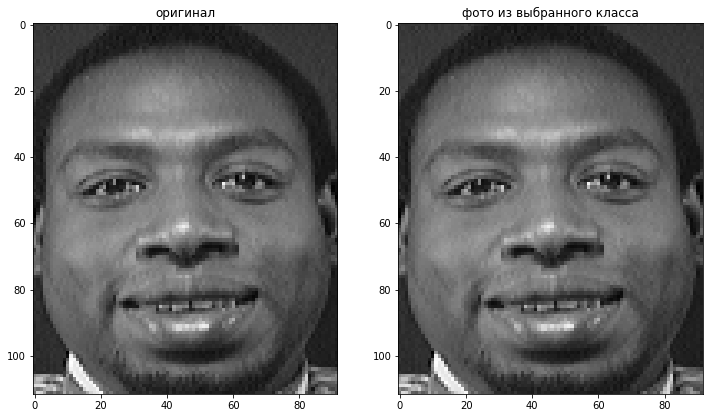

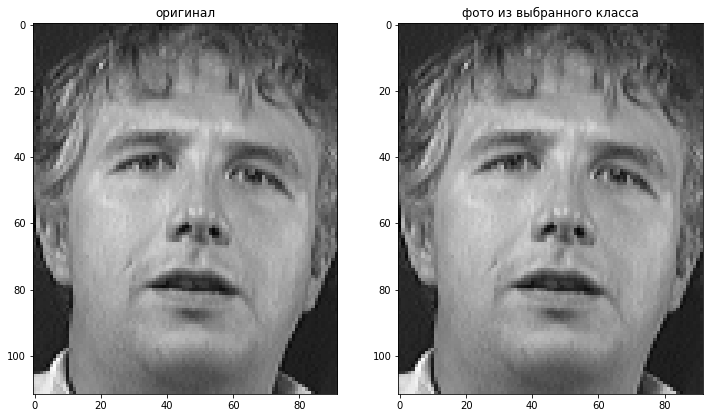

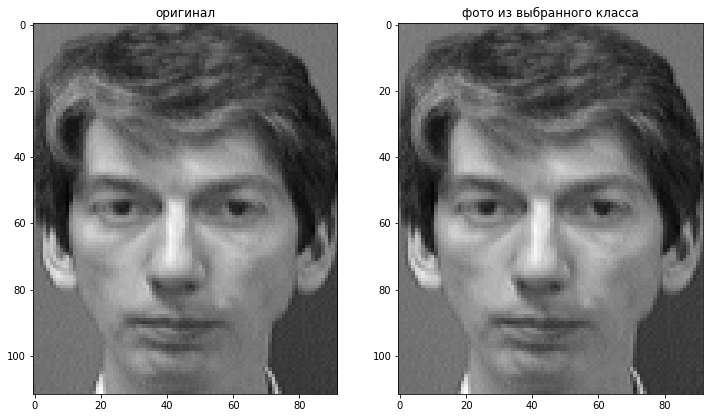

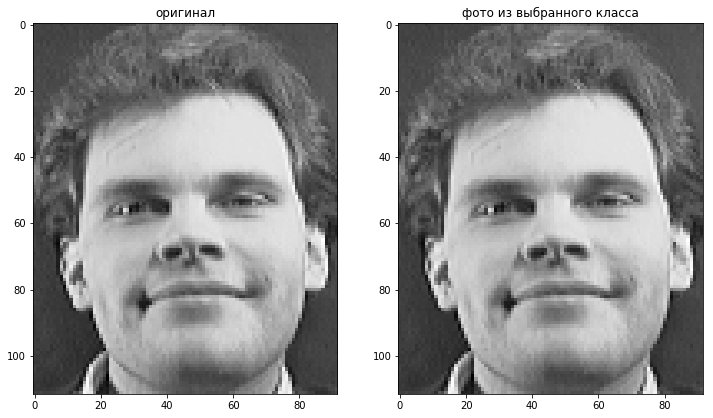

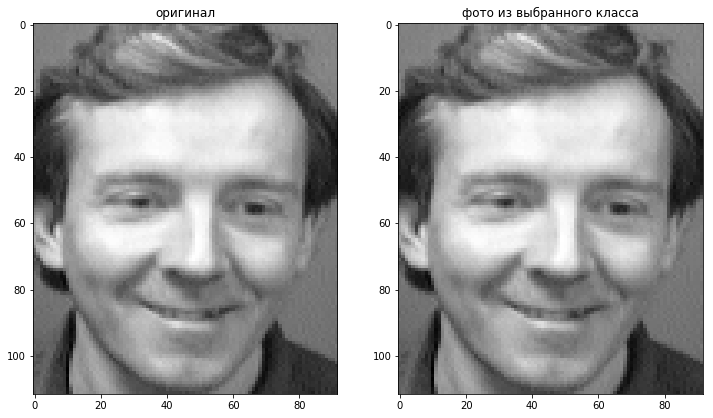

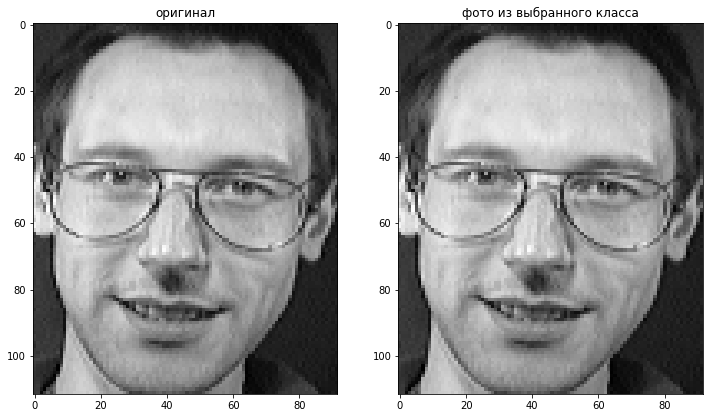

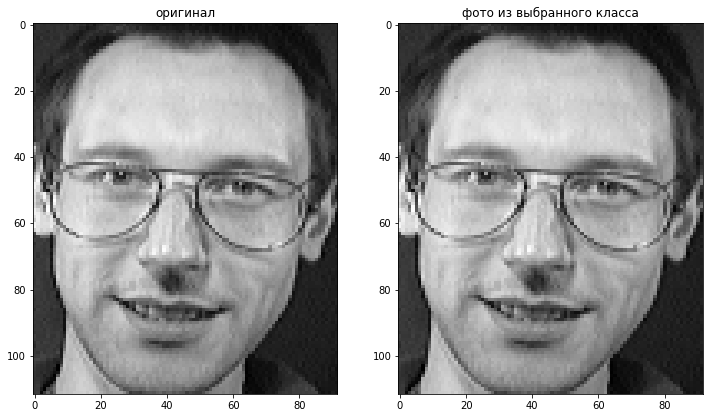

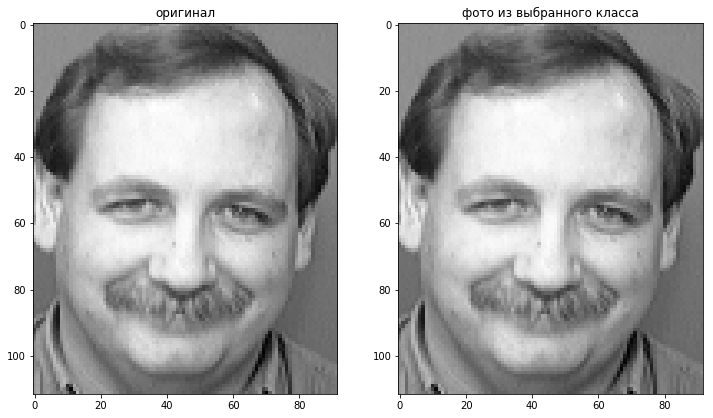

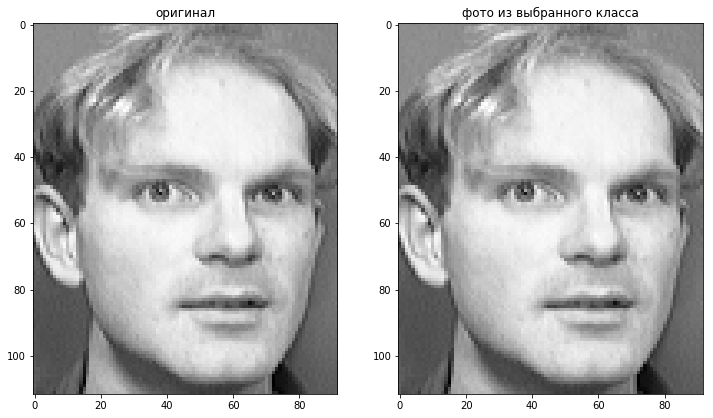

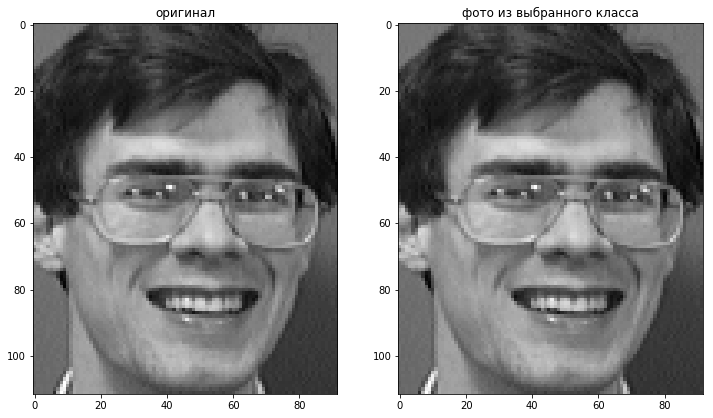

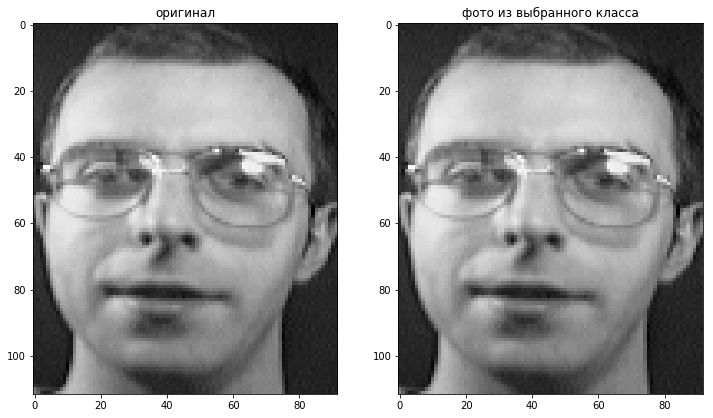

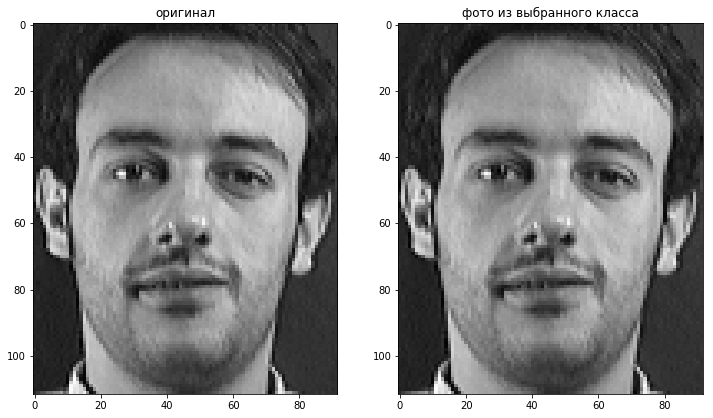

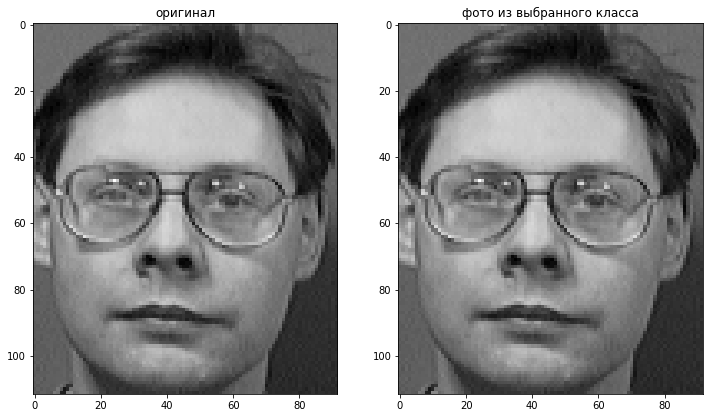

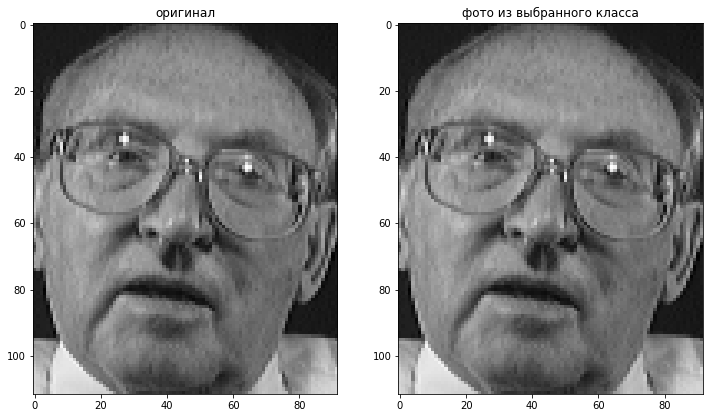

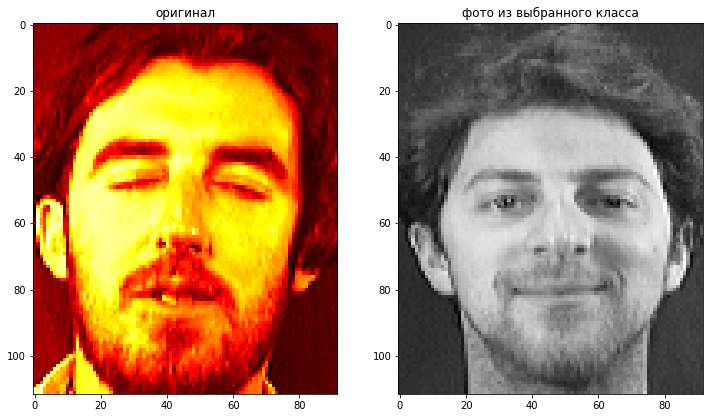

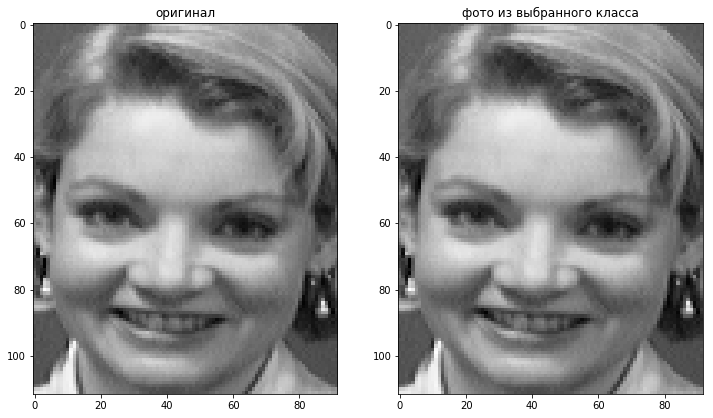

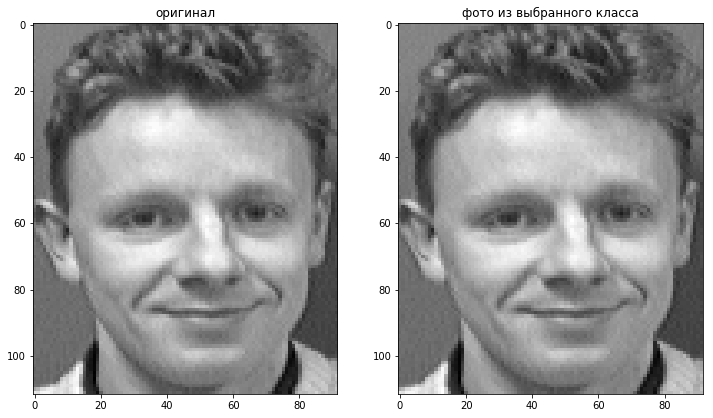

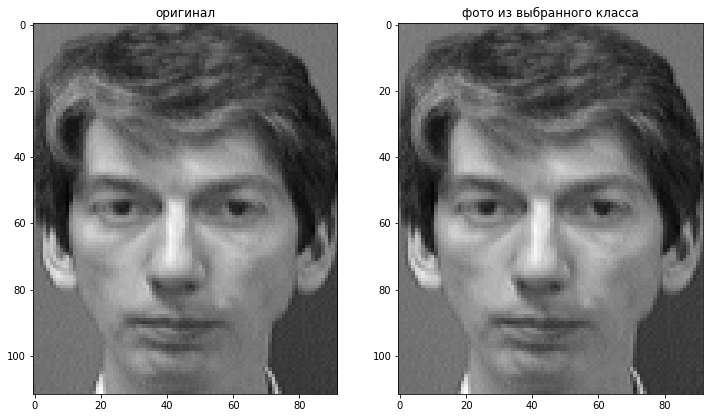

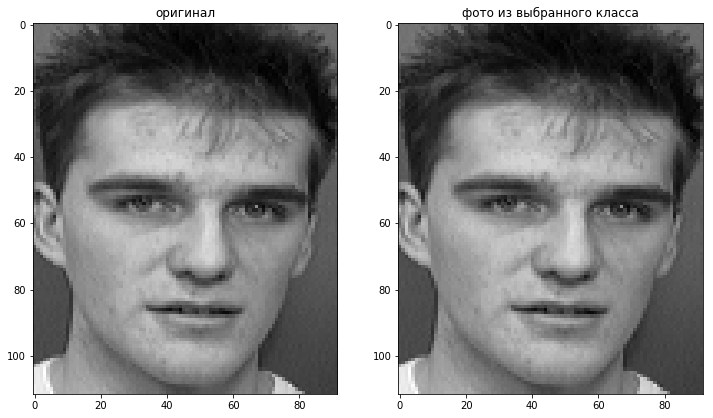

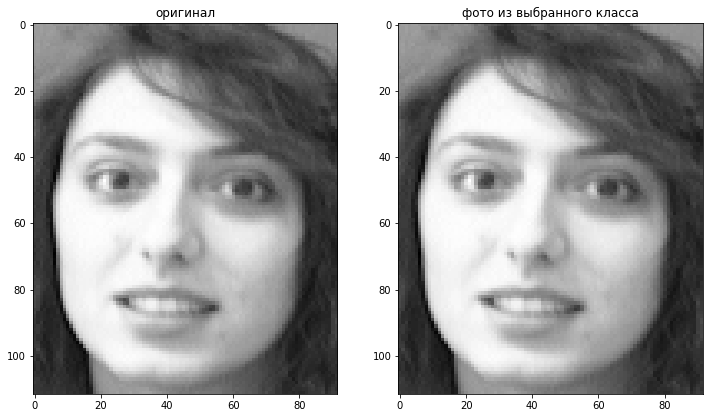

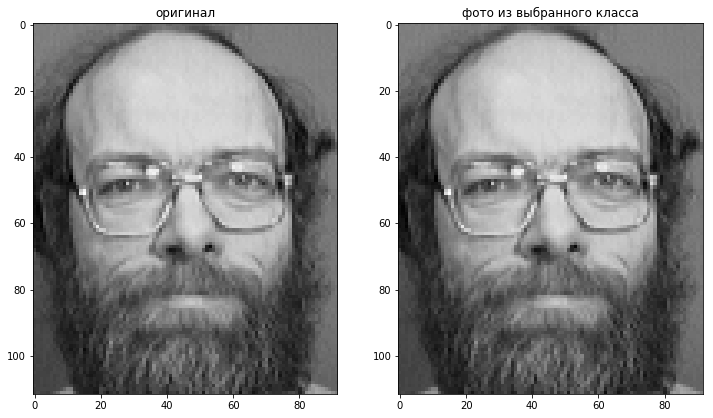

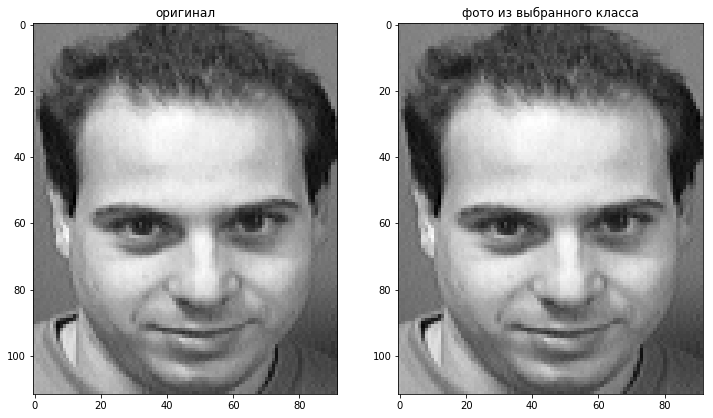

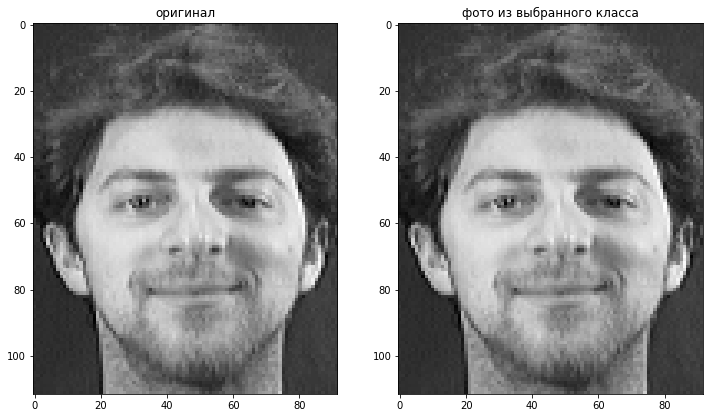

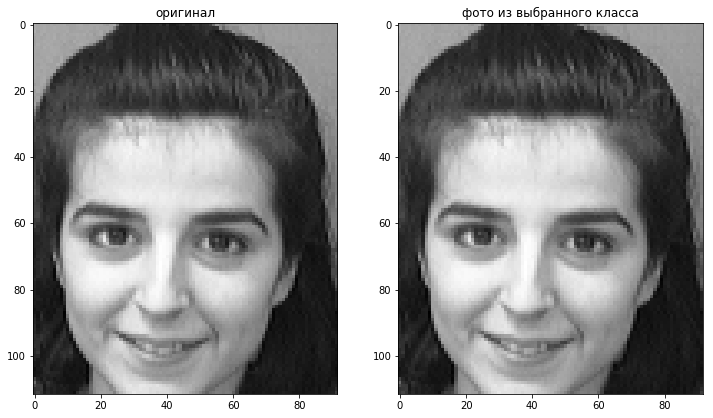

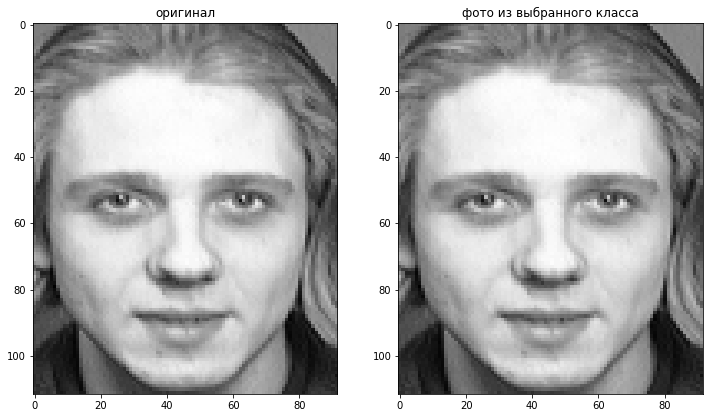

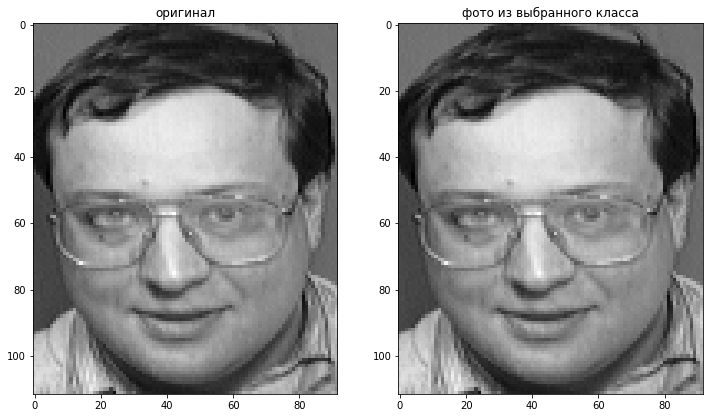

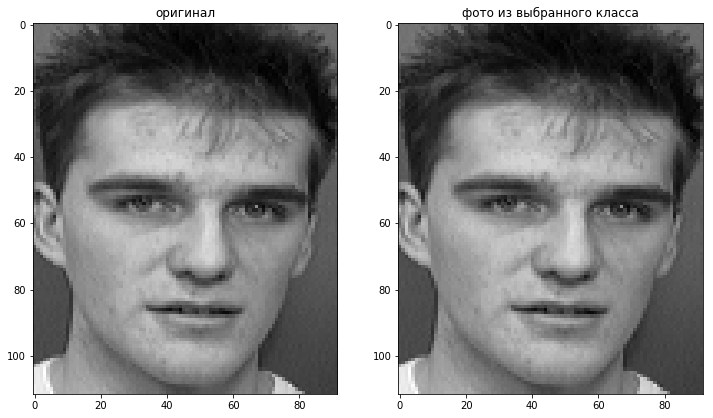

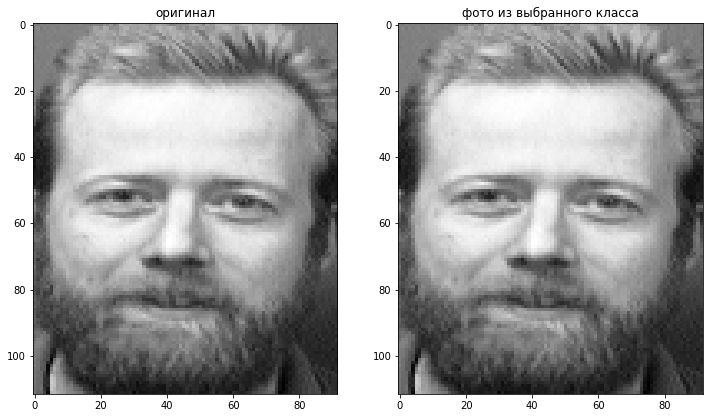

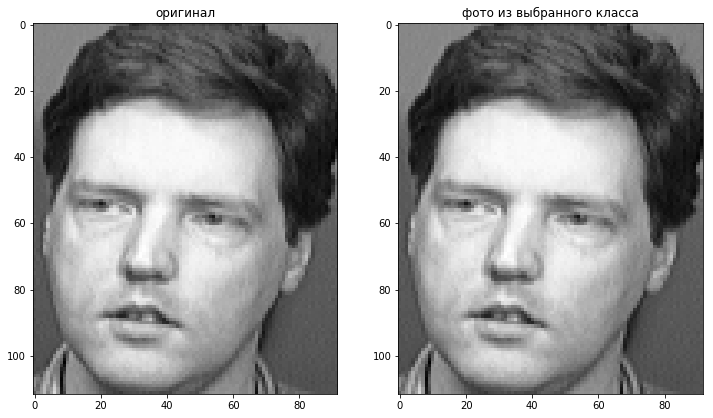

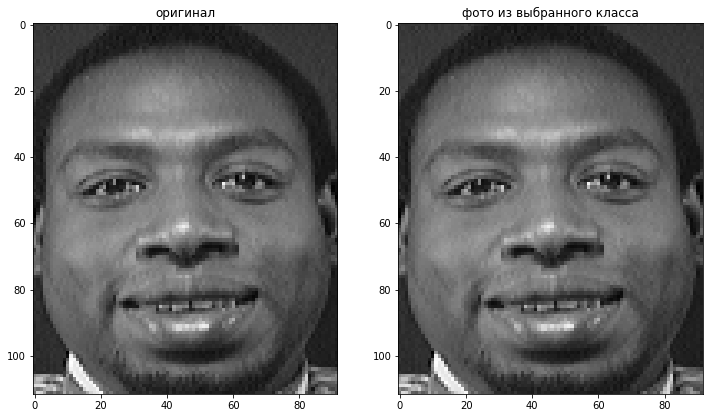

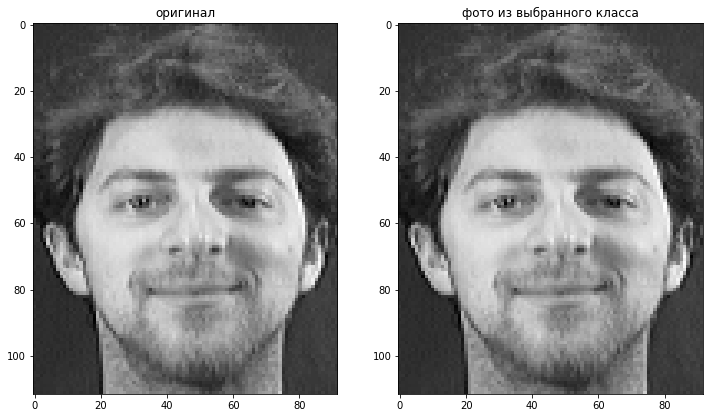

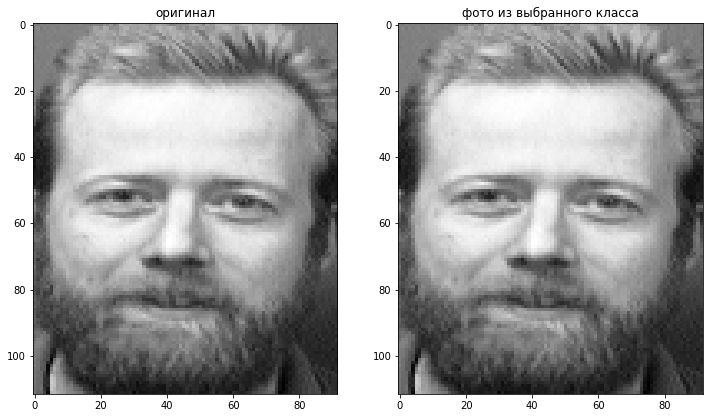

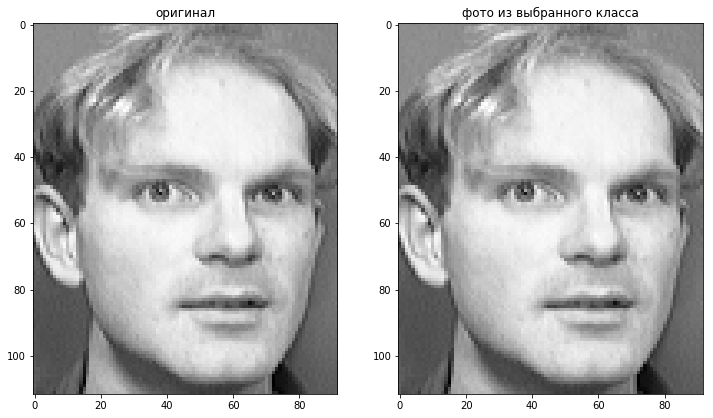

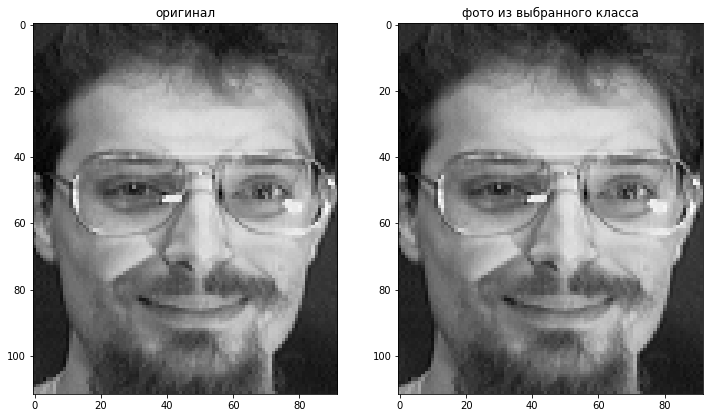

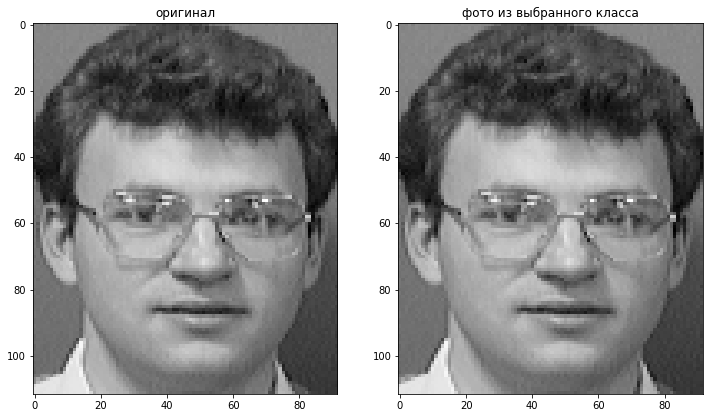

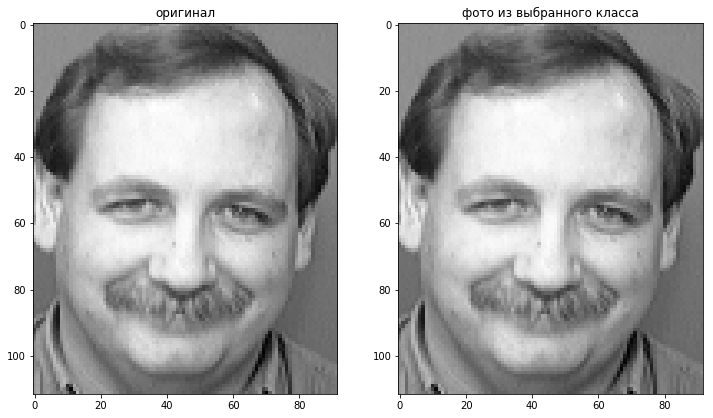

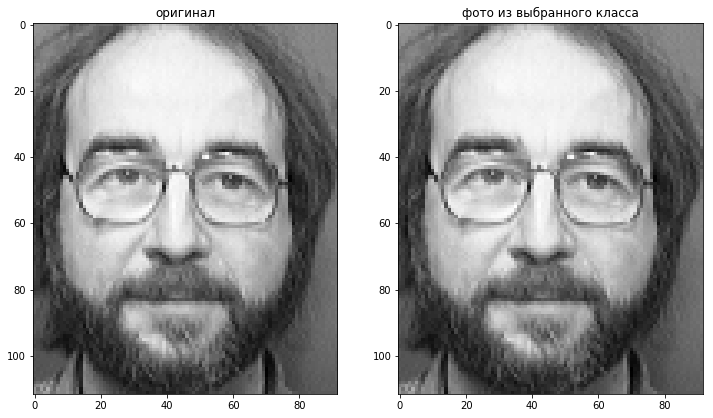

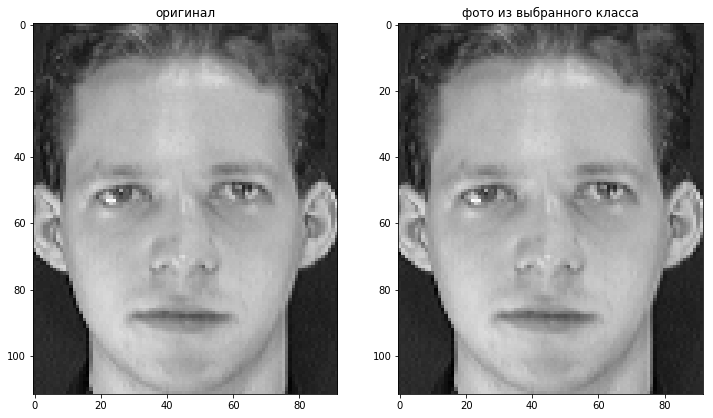

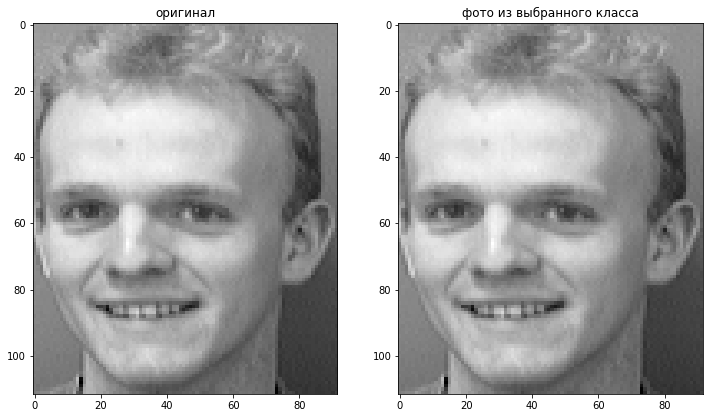

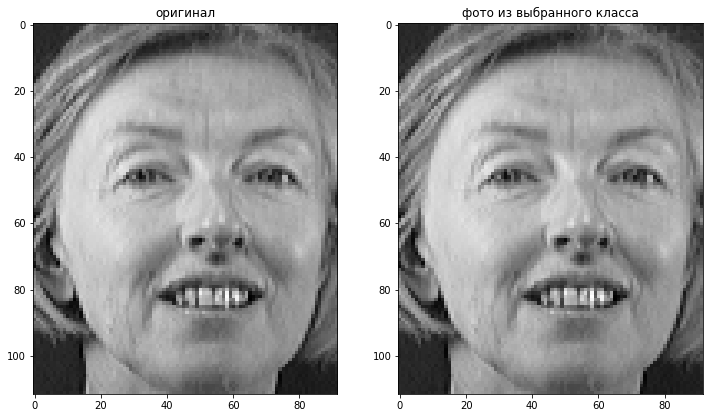

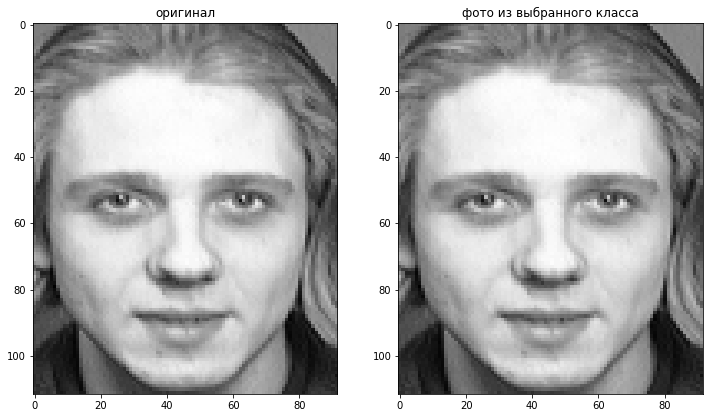

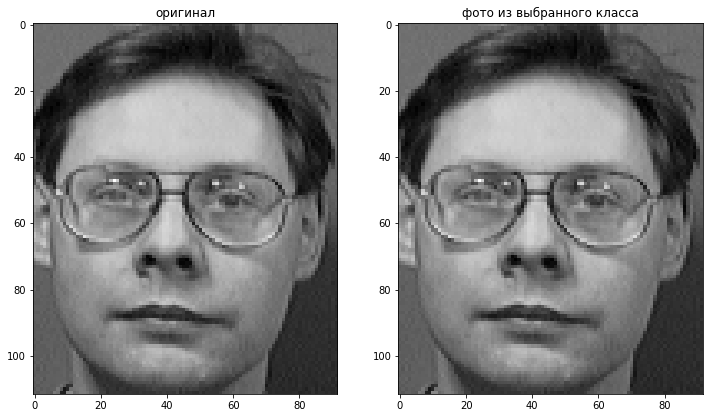

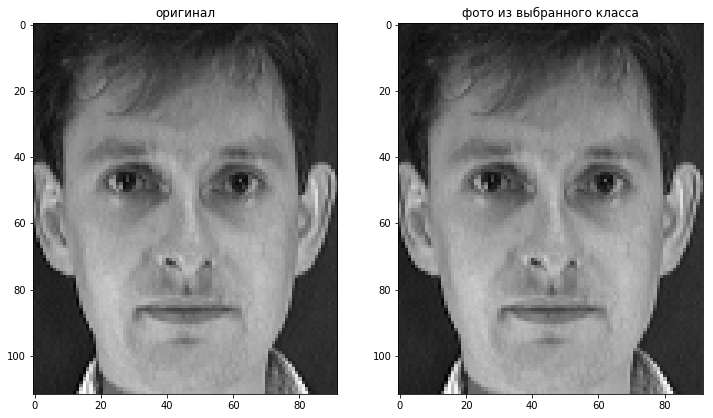

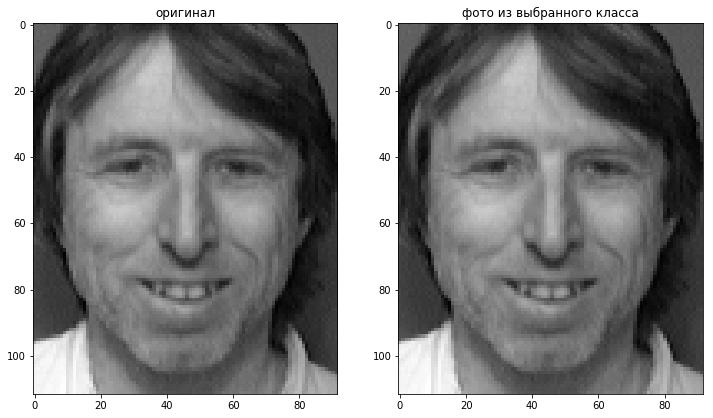

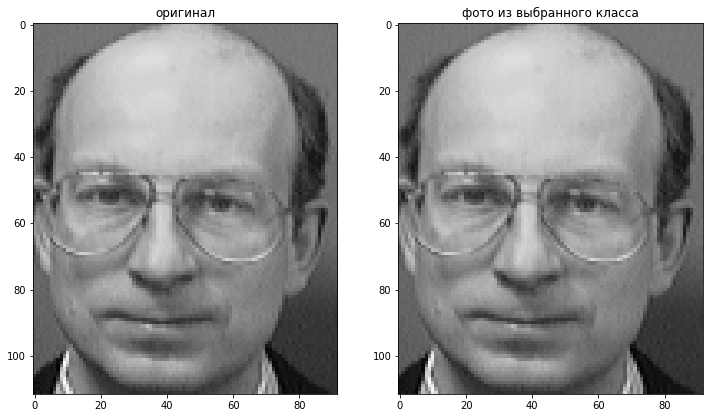

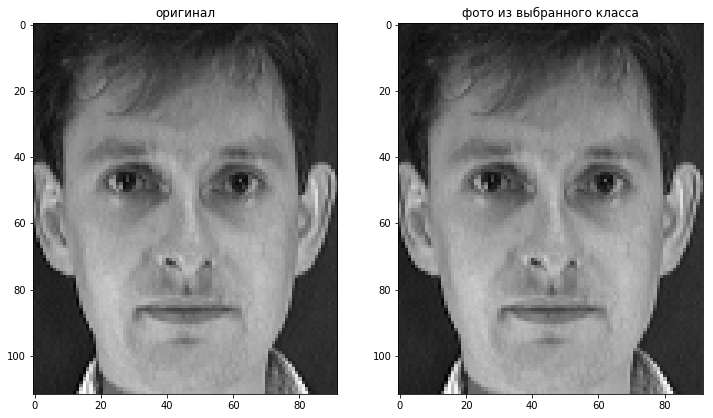

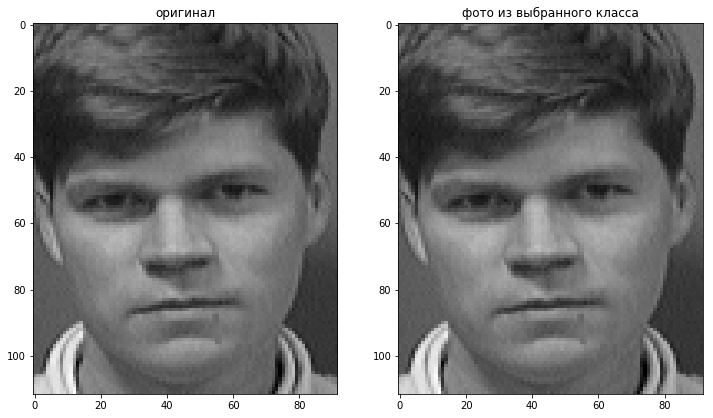

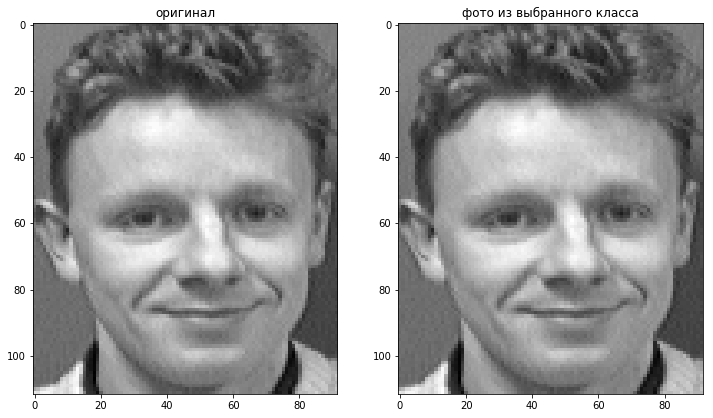

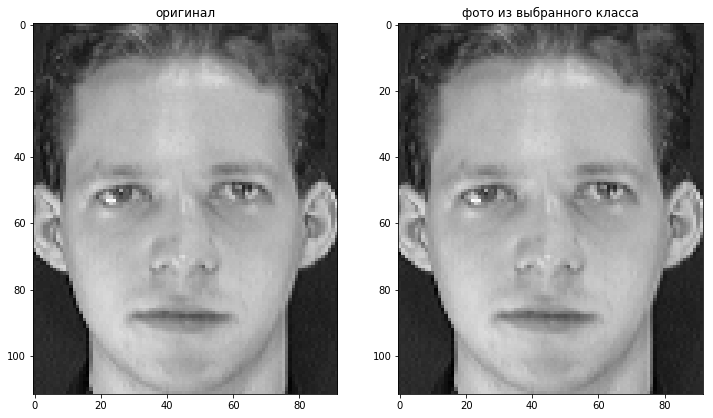

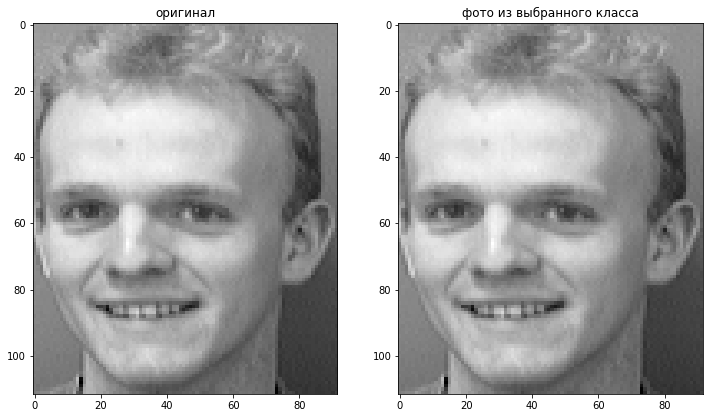

In [17]:
scores = []
for i, size in enumerate(range(40, 370, 40), start=1):
    clear_output(wait=True)
    print(size)
    X_train, X_test, y_train, y_test = train_test_split(images, names, test_size=size, 
                                                        random_state=23, stratify=names)
    s,pred,test=vote(X_train,y_train,X_test,y_test,14,0.67,0.07,[0.15],23)
    l=0
    for j in pred:
        fig=plt.figure(figsize=(12,12))
        if(j == test[l]):
            fig.add_subplot(1, 2, 1)
            plt.imshow(images[j*10], cmap="gray")
            plt.title("оригинал")
        
            fig.add_subplot(1, 2, 2)
            plt.imshow(images[j*10], cmap="gray")
            plt.title("фото из выбранного класса")
        
            display.display(plt.gcf())
            clear_output(wait=True)
            time.sleep(4)
        else:
            fig.add_subplot(1, 2, 1)
            plt.imshow(images[test[l]], cmap="hot")
            plt.title("оригинал")
        
            fig.add_subplot(1, 2, 2)
            plt.imshow(images[j*10], cmap="gray")
            plt.title("фото из выбранного класса")
        
            display.display(plt.gcf())
            clear_output(wait=True)
            time.sleep(1)
        l+=1
    scores.append(s)
fig=plt.figure(figsize=(12,12))
fig.add_subplot(1,1,1)
plot_accuracy(list(reversed(range(40, 370, 40))), scores, 'голосование с оптимальными параметрами')